# Exploratory Data Analysis of Sales Data

***For many companies to remain competitive it's critical that they leverage data analysis and AL/ML to improve their forecasting and future sales models. This usually involves pulling historical sales data and accounting for demand, the current competition, seasonality patterns, the effect of holidays and sales promotions.*** 

***The objective of this project is to carry out analysis of the actual dataset itself in order to determine the characteristics of the features, reliability of the data, strenght of detail and any weaknesses and/or missing data in the dataset. The second aim of the project is to explore the data and pull new information and insights wherever possible. Of course Data Analysis would only be the first step for the business when building perdictive models for forecasing future sales. The other steps would include Feature Engineering, Feature Selection, Model Building and finally deployment.***


## The Data

**The sales data is drawn from 1115 stores and includes two files:**
- Transaction Data
- Store Data

**Transaction Data**
- almost a million observation 
- 1115 unique stores 
- Id: transaction ID (combination of Store and date) 
- Store: unique store Id
- Sales: sales/day, this is what we most likely would try to predict 
- Customers: number of customers on a given day
- Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
- Promo: describes if store is running a promo on that day or not
- StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
- SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
- Data Source: https://www.kaggle.com/c/rossmann-store-sales/data

**Store Data**
- StoreType: categorical variable to indicate type of store (a, b, c, d)
- Assortment: describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance (meters): distance to closest competitor store
- CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
- Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
- Promo2Since [Year/Week]: date when the store started participating in Promo2
- PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


### IMPORT LIBRARIES AND DATASET 

In [271]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import warnings
warnings.filterwarnings("ignore")

In [272]:
# datasets
sales = pd.read_csv('train.csv') # all tranaction data
store = pd.read_csv('store.csv') # store specific information

<u>Sales Data</u>

In [273]:
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [276]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


- ***9 columns in total (ints & objects)***
- ***8 features, each contains 1017209 data points***
- ***1 target variable (sales)***

In [277]:
sales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


- ***Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551***
- ***Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388***
- ***Note the dataset includes the transactions recorded per day (in millions)***

<u>Stores Data</u>

In [278]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


- ***This dataframe only includes information about the unique 1115 stores that are part of this study***

In [279]:
store.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


In [10]:
print('Average competition Distance is: ',round(store['CompetitionDistance'].mean(), 2), "meters")
print('Average competition Distance is: ',round(store['CompetitionDistance'].mean())/1000, "km")  


Average competition Distance is:  5404.9 meters
Average competition Distance is:  5.405 km


- ***on average, the competition distance is 5404 meters away (5.4 kms)***

## Exploratory Data Analysis

#### <u>EXPLORE SALES DATA</u>


In [280]:
# any missing data, luckily we don't!
sales.isnull().sum().any()

False

****Distributions****

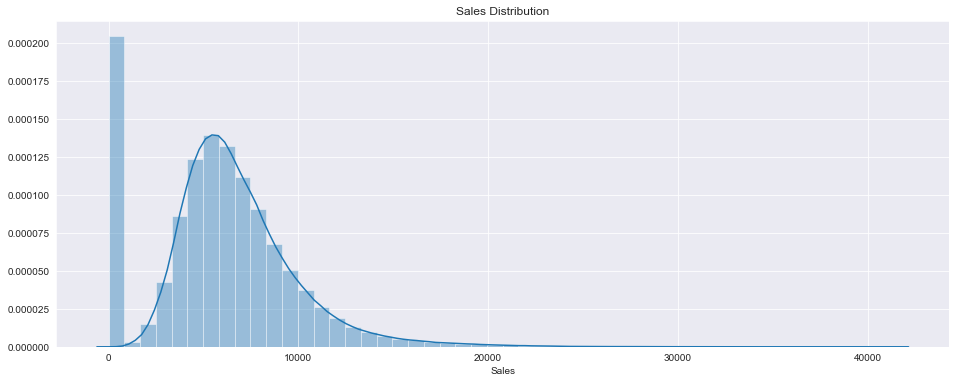

In [281]:
# Sales
plt.figure(figsize=(16,6)) 
sns.distplot(sales['Sales'])
plt.title("Sales Distribution")
plt.show()

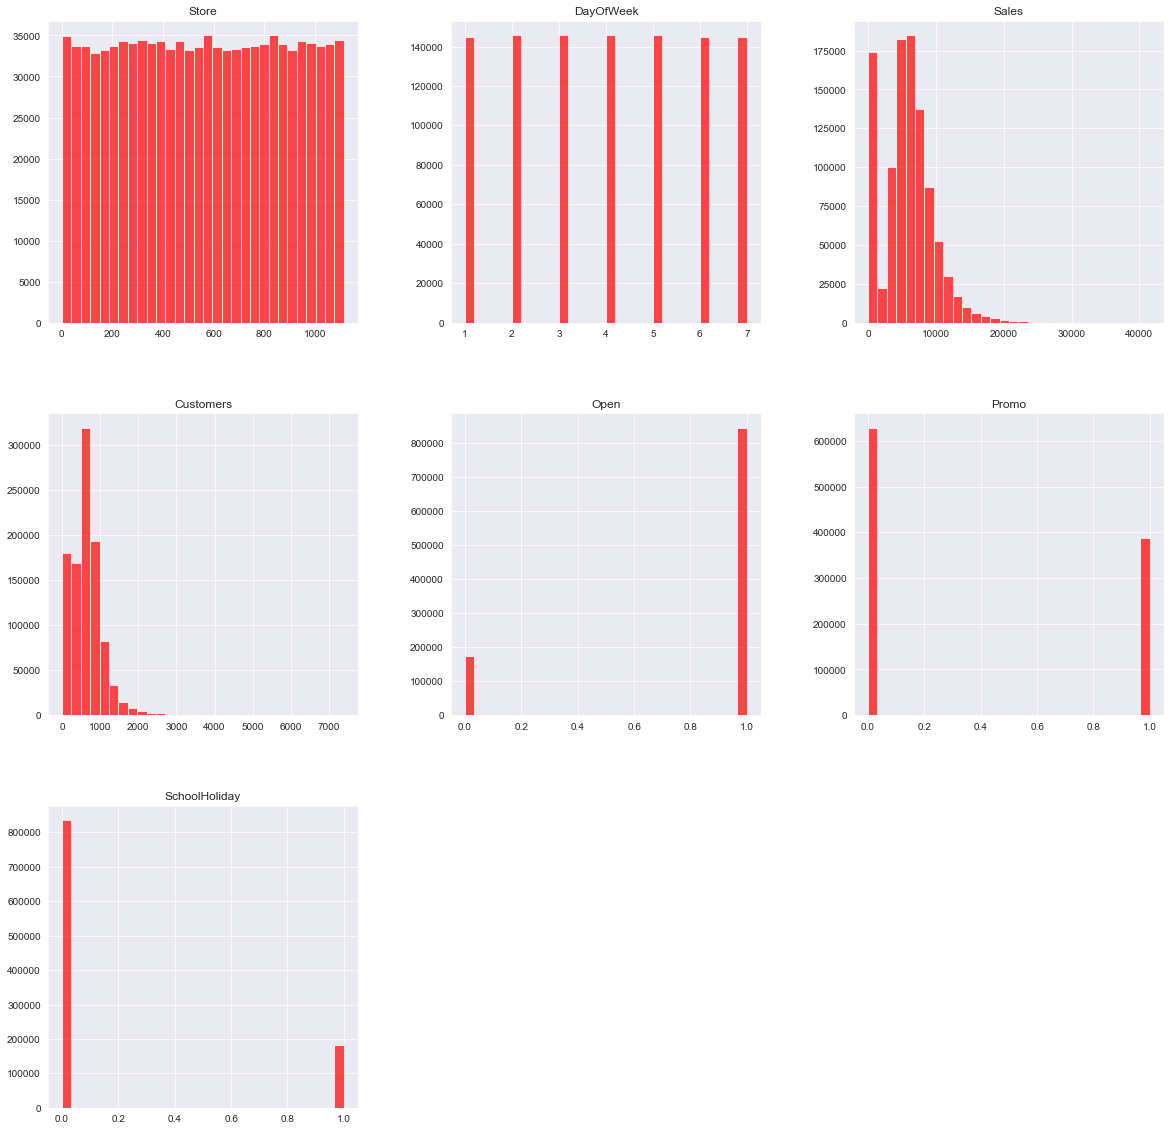

In [282]:
# Plot histogram of sales data
sales.hist(bins=30, color='red', alpha=0.7, figsize=(20,20))
plt.show()

Distributions:
- Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
- Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
- Stores are open ~80% of the time
- Data is equally distributed among all stores (no bias)
- Promo #1 was running ~40% of the time 
- Average sales around 5000-6000 Euros
- School holidays are around ~18% of the time

In [283]:
# max number of customers
print("Max number of customers:",sales['Customers'].max())

Max number of customers: 7388


In [284]:
print()
print("How many stores are open and closed!")
print()
# Count the number of stores that are open and closed
print("Stores Closed: ",len(sales[sales['Open'] == 0]))
print("Stores Open:   ",len(sales[sales['Open'] == 1]))
print('Total Stores:  ',len(sales))


How many stores are open and closed!

Stores Closed:  172817
Stores Open:    844392
Total Stores:   1017209


***Obviously there will be no sales and promos if they aren't open so lets remove closed stores from the dataset***

In [285]:
sales = sales[sales["Open"]==1]

****Let's drop the open column since it has no meaning now****

In [286]:
sales.drop('Open', axis=1, inplace=True)

In [287]:
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


****Lets see the impact on sales with the removal of closed stores****


In [18]:
sales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,844392.0,558.422920,321.731914,1.0,280.0,558.0,837.0,1115.0
DayOfWeek,844392.0,3.520361,1.723689,1.0,2.0,3.0,5.0,7.0
Sales,844392.0,6955.514291,3104.214680,0.0,4859.0,6369.0,8360.0,41551.0
Customers,844392.0,762.728395,401.227674,0.0,519.0,676.0,893.0,7388.0
Promo,844392.0,0.446352,0.497114,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,844392.0,0.193580,0.395103,0.0,0.0,0.0,0.0,1.0


 ***Average sales = 6955 Euros,	average number of customers = 762 (went up)***

#### <u>EXPLORE Stores DATA</u>

****Distributions****

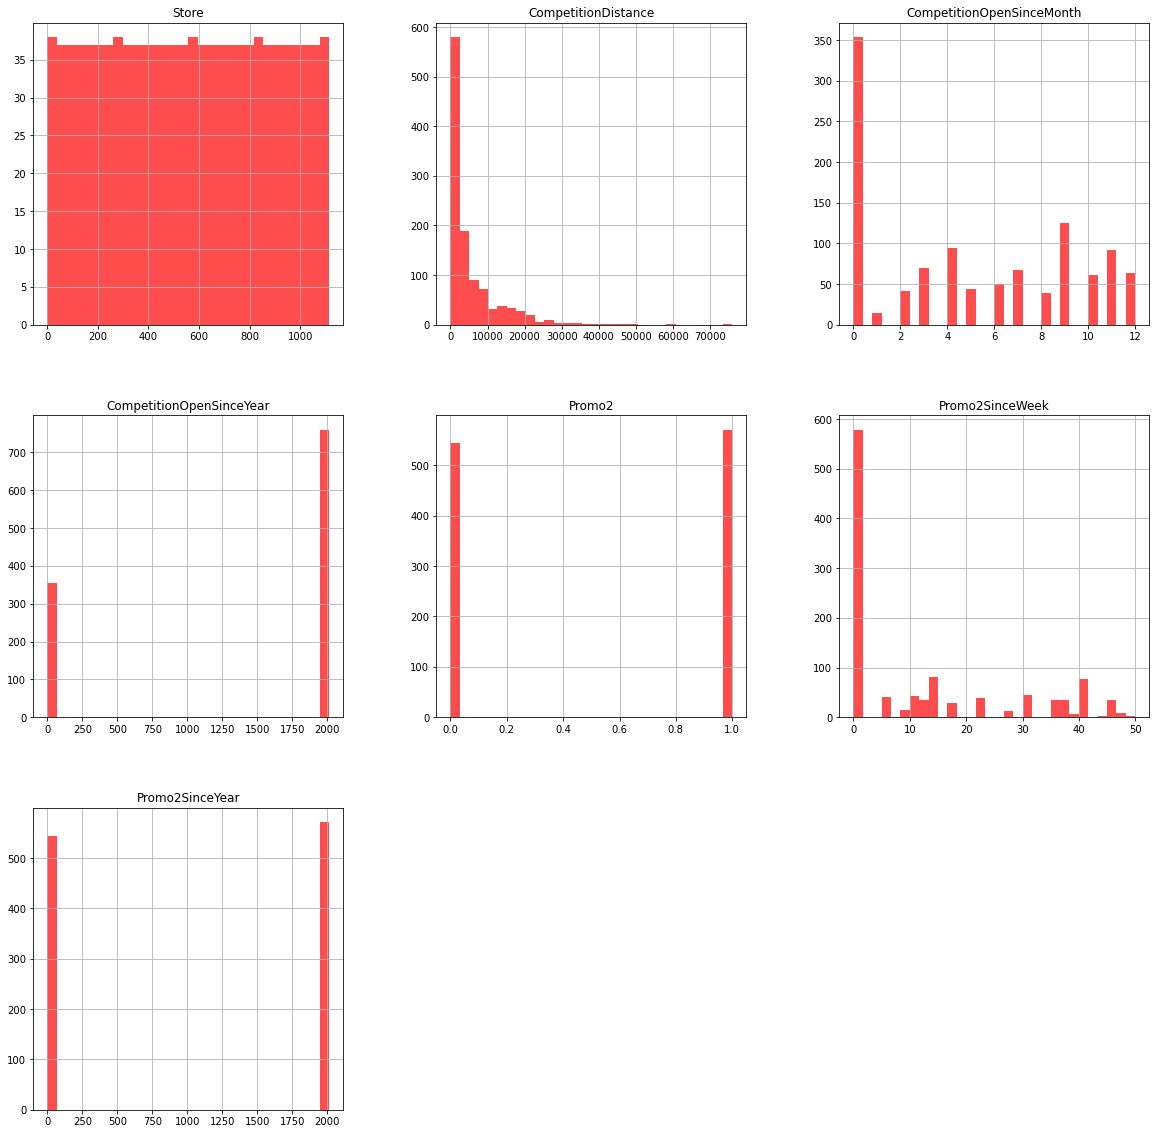

In [242]:
# Plot histogram of sales data
store.hist(bins=30, color='red', alpha=0.7, figsize=(20,20))
plt.show()

In [312]:
print('Average competition Distance is: ',round(store['CompetitionDistance'].mean())/1000, "km")  

Average competition Distance is:  5.405 km


- ***Average competition distance is 5.405 km***
- ***Approximately half the stores ran Promo2***

In [19]:
# Let's see if we have any missing data in the stores dataset!
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

****The dataset has some missing points, lets explore further!****

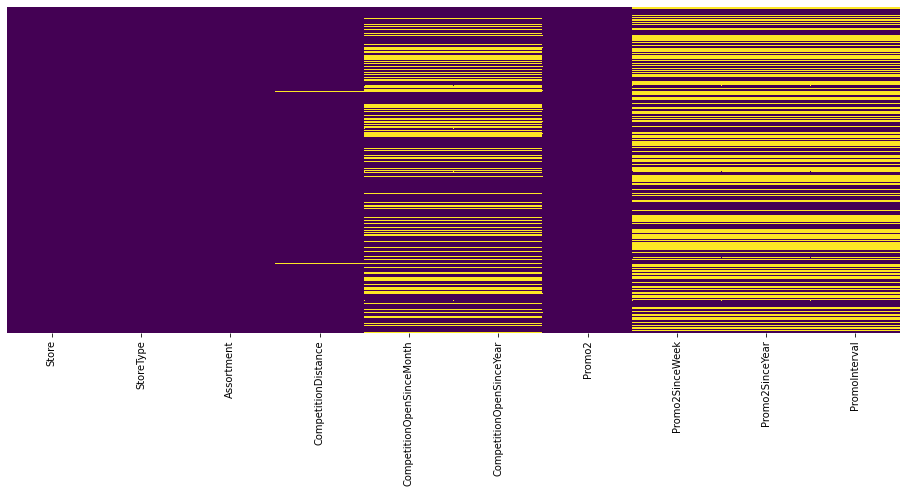

In [210]:
plt.figure(figsize=(16,6))
sns.heatmap(store.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [147]:
# make a list of the features that contain missing values (using list comprehension)
vars_with_na = [var for var in store.columns if store[var].isnull().sum()>1]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, "= Percentage of data missing: ",np.round((store[var].isnull().sum()/len(store))*100,2),'%')

CompetitionDistance = Percentage of data missing:  0.269 %
CompetitionOpenSinceMonth = Percentage of data missing:  31.749 %
CompetitionOpenSinceYear = Percentage of data missing:  31.749 %
Promo2SinceWeek = Percentage of data missing:  48.789 %
Promo2SinceYear = Percentage of data missing:  48.789 %
PromoInterval = Percentage of data missing:  48.789 %


***For 'CompetitionDistance':***
- ***Only 3 rows missing***

In [148]:
# show missing data rows 
store[store['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


****let's fill the missing values with the average values of the 'CompetitionDistance' column & recheck for null values****

In [288]:
# return all the rows with 'CompetitionDistance' == NaN and change those rows to the mean of all the 'CompetitionDistance' values.
store.loc[(store['CompetitionDistance'].isnull() == True), 'CompetitionDistance'] = store['CompetitionDistance'].mean()

In [289]:
print("Number of null values: ",store['CompetitionDistance'].isnull().sum())

Number of null values:  0


***For 'CompetitionOpenSinceMonth' & 'CompetitionOpenSinceYear':***
- ***354 rows missing - almost one third of the 1115 stores***
- ***if 'CompetitionOpenSinceMonth' is NaN then 'CompetitionOpenSinceYear' will also be NaN***

In [213]:
# check that if 'CompetitionOpenSinceMonth' is NaN then 'CompetitionOpenSinceYear' will also be NaN
store[store['CompetitionOpenSinceMonth'].isnull()].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


***For 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval':***
- ***544 rows missing - almost one third of the 1115 stores***
- ***It appears that if 'promo2' is zero, all the columns 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to NaN***

In [26]:
store[store['Promo2SinceWeek'].isnull()].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN


****Lets set the values for 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', Promo2SinceWeek', 'Promo2SinceYear' & 'PromoInterval to zeros****


In [290]:
nan_cols = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
for nan in nan_cols:
    store[nan].fillna(0, inplace=True)

****Lets check if we still have missing data****

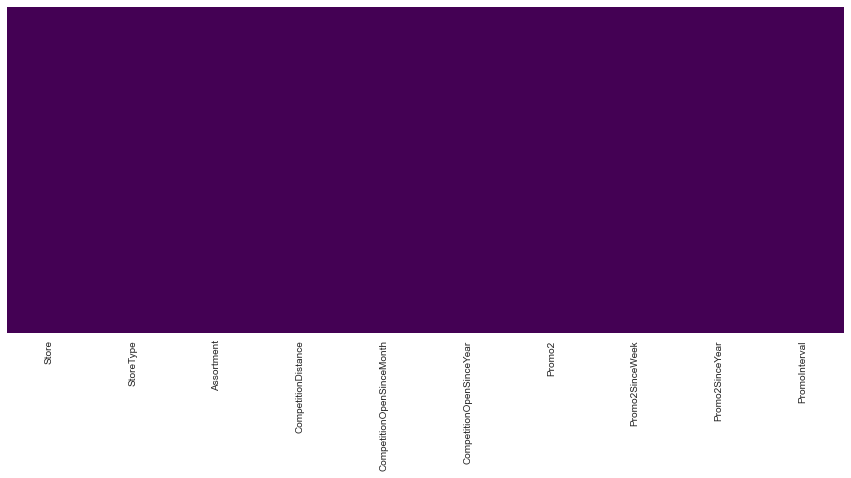

In [291]:
plt.figure(figsize=(15,6))
sns.heatmap(store.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

#### <u>Explore Merged Datasets</u>
Let's merge both data frames together based on 'store'

In [292]:
# Both files have store ids as common 
print(len(store['Store'].unique()))
print(len(sales['Store'].unique()))

1115
1115


In [56]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [57]:
sales.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

****Merge datasets****

In [293]:
# Merge the two datasets
df_merge = pd.merge(sales, store, on='Store') # how='inner' by default
df_merge.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [264]:
# plt.figure(figsize=(14,7))
# df_merge[df_merge['StoreType']=='a']['Sales'].hist(alpha=0.5,color='red',bins=30,label='StoreType=a')
# df_merge[df_merge['StoreType']=='b']['Sales'].hist(alpha=0.5,color='blue',bins=30,label='StoreType=b')
# df_merge[df_merge['StoreType']=='c']['Sales'].hist(alpha=0.5,color='yellow',bins=30,label='StoreType=c')
# df_merge[df_merge['StoreType']=='d']['Sales'].hist(alpha=0.5,color='green',bins=30,label='StoreType=d')
# plt.legend()
# plt.show()

****<u>Feature Destributions for Sales</u>****

****Store Type****

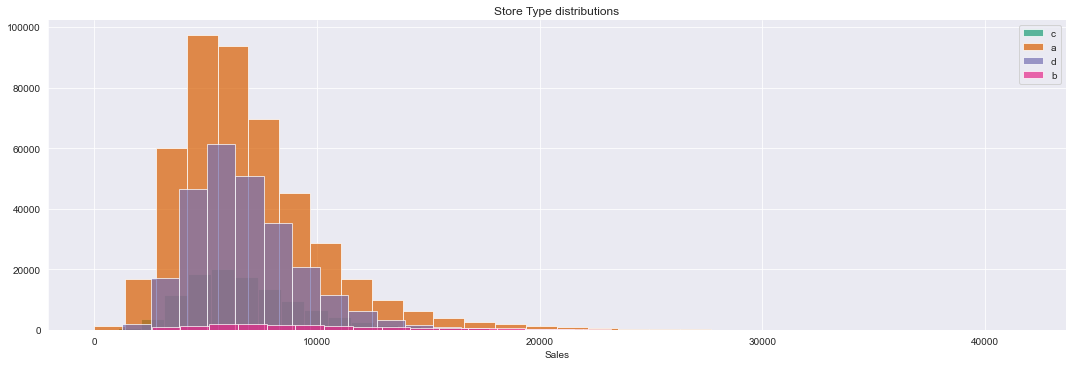

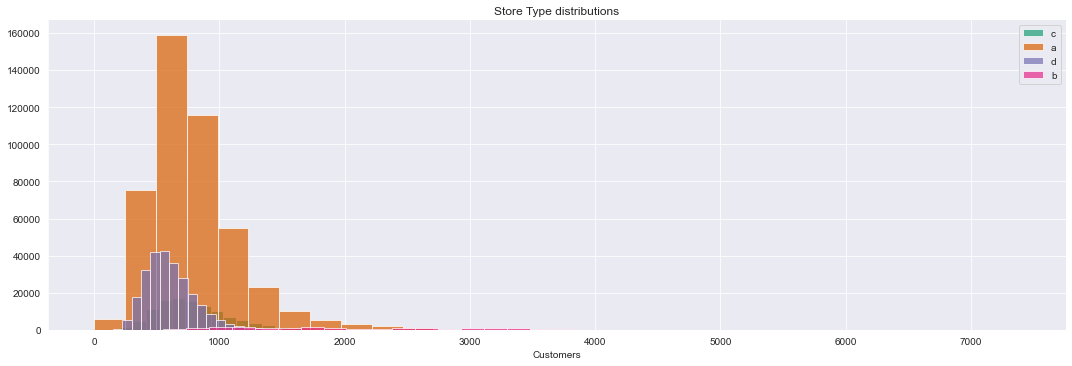

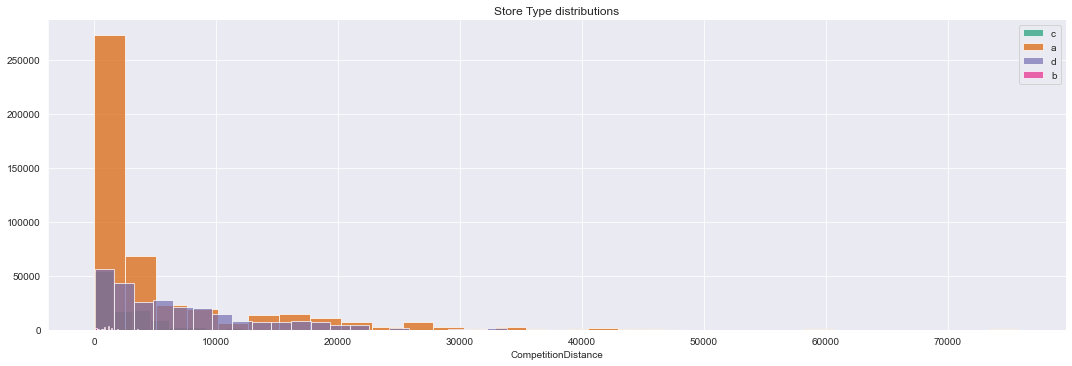

In [294]:
num_vars = ['Sales', 'Customers', 'CompetitionDistance']
def analyse_numeric(df_merge, var):
    df = df_merge.copy()
    
    sns.set_style('darkgrid')
    g = sns.FacetGrid(df_merge,hue="StoreType",palette='Dark2',height=5,aspect=3)
    g = g.map(plt.hist,var,bins=30,alpha=0.7)
    plt.title('Store Type distributions')
    plt.legend()
    plt.xlabel(var)
    plt.show()
    
for var in num_vars:
    analyse_numeric(df_merge, var)

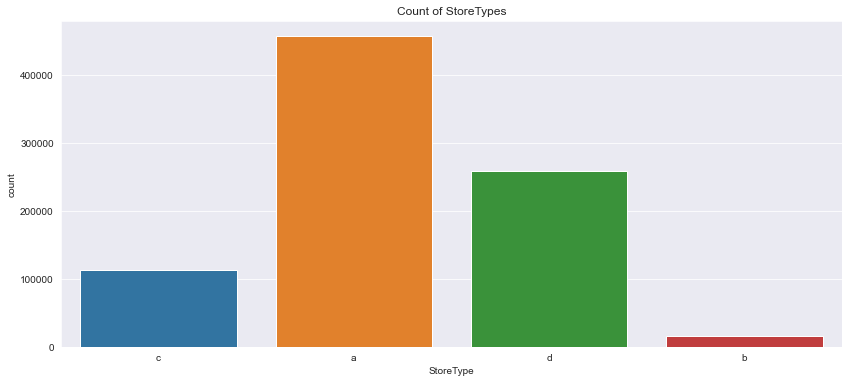

In [320]:
plt.figure(figsize=(14,6))
sns.countplot(x='StoreType',data=df_merge)
plt.title('Count of StoreTypes')
plt.show()

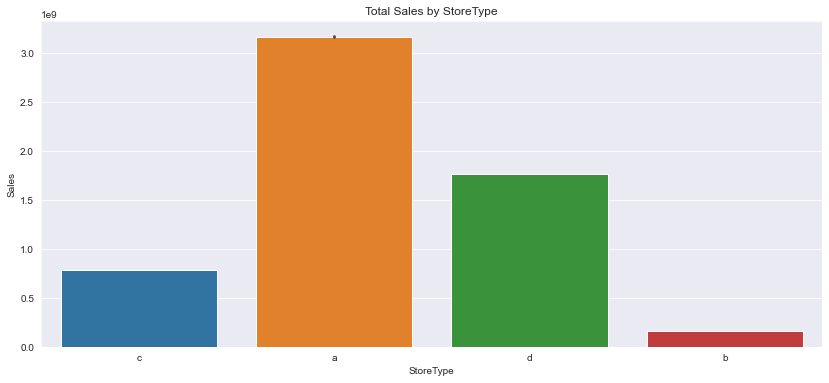

In [321]:
plt.figure(figsize=(14,6))
sns.barplot(x='StoreType', y='Sales', data = df_merge, estimator=sum)
plt.title('Total Sales by StoreType')
plt.show()

- ***Most Stores are type 'a' and that's reflected in the number of customers and the total sales***


****Assortment****

We will assign descriptions to the Assortment labels to improve analysis 

In [328]:
# Change Assortment labels
labels = {'a':'Basic','b':'Extra','c':'Extended'}
df_merge['AssortName'] = df_merge['Assortment'].map(labels)
df_merge['AssortName'].unique()

array(['Basic', 'Extended', 'Extra'], dtype=object)

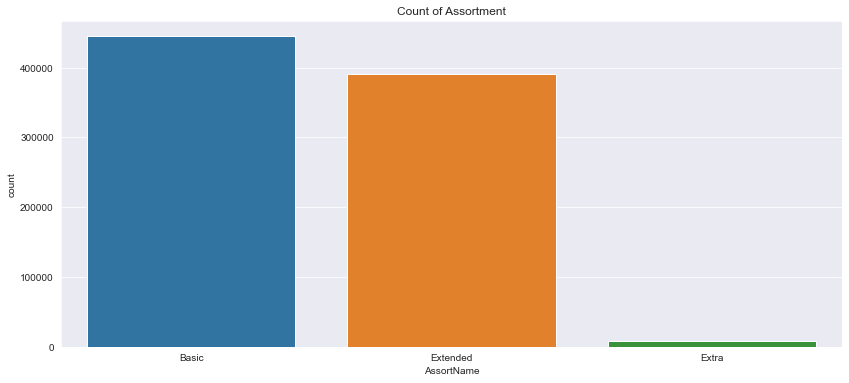

In [329]:
plt.figure(figsize=(14,6))
sns.countplot(x='AssortName',data=df_merge)
plt.title('Count of Assortment')
plt.show()

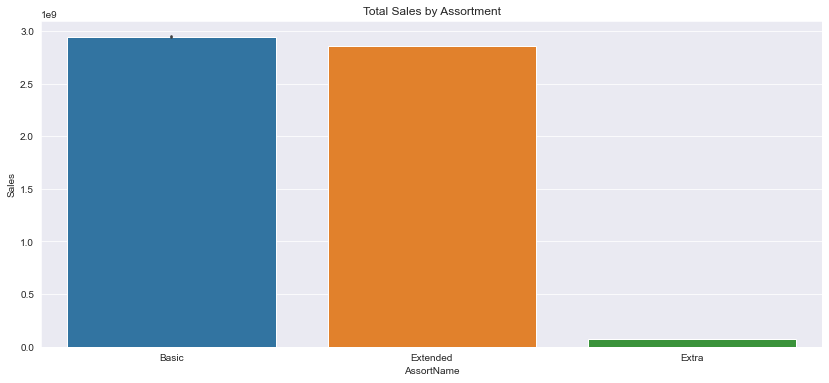

In [330]:
plt.figure(figsize=(14,6))
sns.barplot(x='AssortName', y='Sales', data = df_merge, estimator=sum)
plt.title('Total Sales by Assortment')
plt.show()

- ***Most stores are Basic or Extended and this is reflected in total sales although, Extended stores have similar sales figures to Basic stores even though there are less stores***

****Promo Analysis****

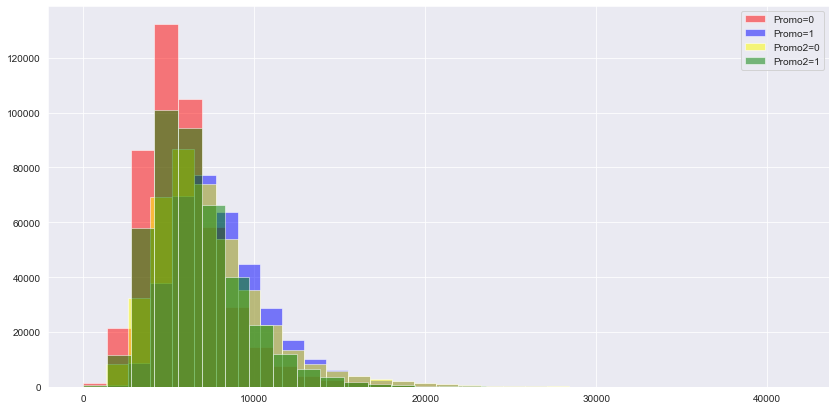

In [359]:
plt.figure(figsize=(14,7))
df_merge[df_merge['Promo']==0]['Sales'].hist(alpha=0.5,color='red',bins=30,label='Promo=0')
df_merge[df_merge['Promo']==1]['Sales'].hist(alpha=0.5,color='blue',bins=30,label='Promo=1')
df_merge[df_merge['Promo2']==0]['Sales'].hist(alpha=0.5,color='yellow',bins=30,label='Promo2=0')
df_merge[df_merge['Promo2']==1]['Sales'].hist(alpha=0.5,color='green',bins=30,label='Promo2=1')
plt.legend()
plt.show()

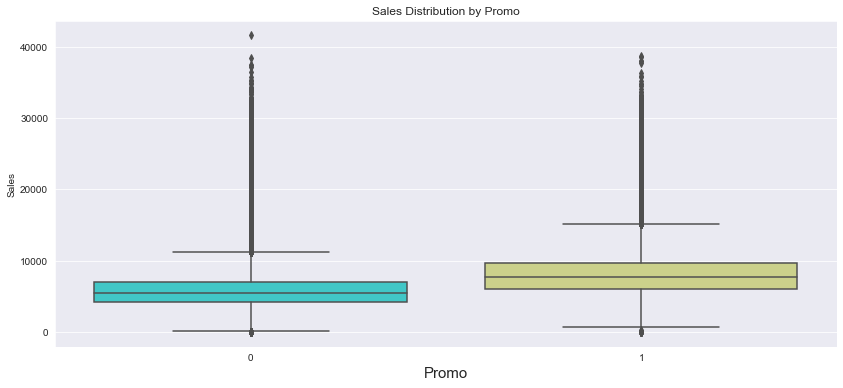

In [356]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Promo", y="Sales", data=df_merge, palette='rainbow')
plt.title('Sales Distribution by Promo')
plt.xlabel('Promo', fontsize=15)
plt.show()


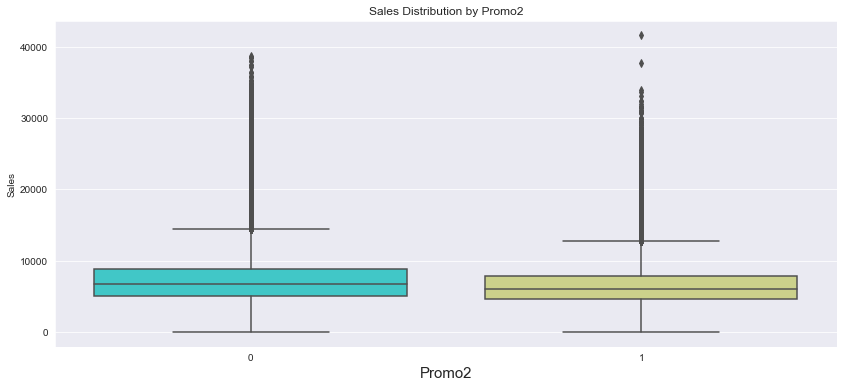

In [360]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Promo2", y="Sales", data=df_merge, palette='rainbow')
plt.title('Sales Distribution by Promo2')
plt.xlabel('Promo2', fontsize=15)
plt.show()


- ***Overall sales did increase for stores that did participate in the Promo***
- ***Promo2 apppear to have little impact on sales*** 

#### <u>Feature Correlation (with Sales)</u>

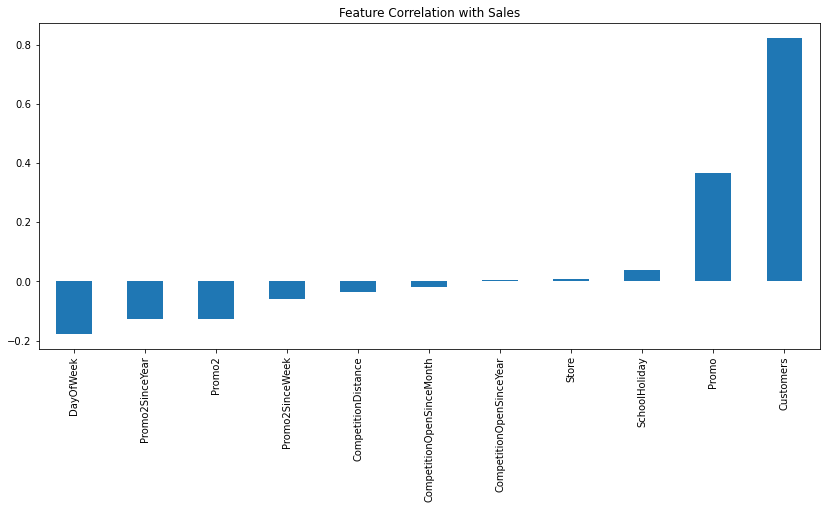

In [217]:
plt.figure(figsize=(14,6))
corr = df_merge.corr()['Sales'].sort_values()
corr[:-1].plot(kind='bar') # remove the Sales label
plt.title('Feature Correlation with Sales')
plt.show()

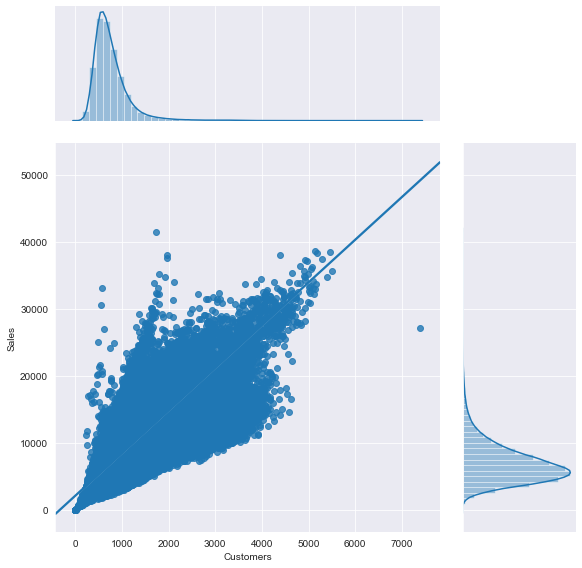

In [381]:
sns.jointplot(y='Sales', x='Customers', data=df_merge, kind="reg", height=8, ratio=3)

- ***Customers and promo are positively correlated with sales***
- ***Promo2 has no impact on sales***
- ***Competitor Distance also has little impact on sales***

#### <u>Feature Correlation</u>

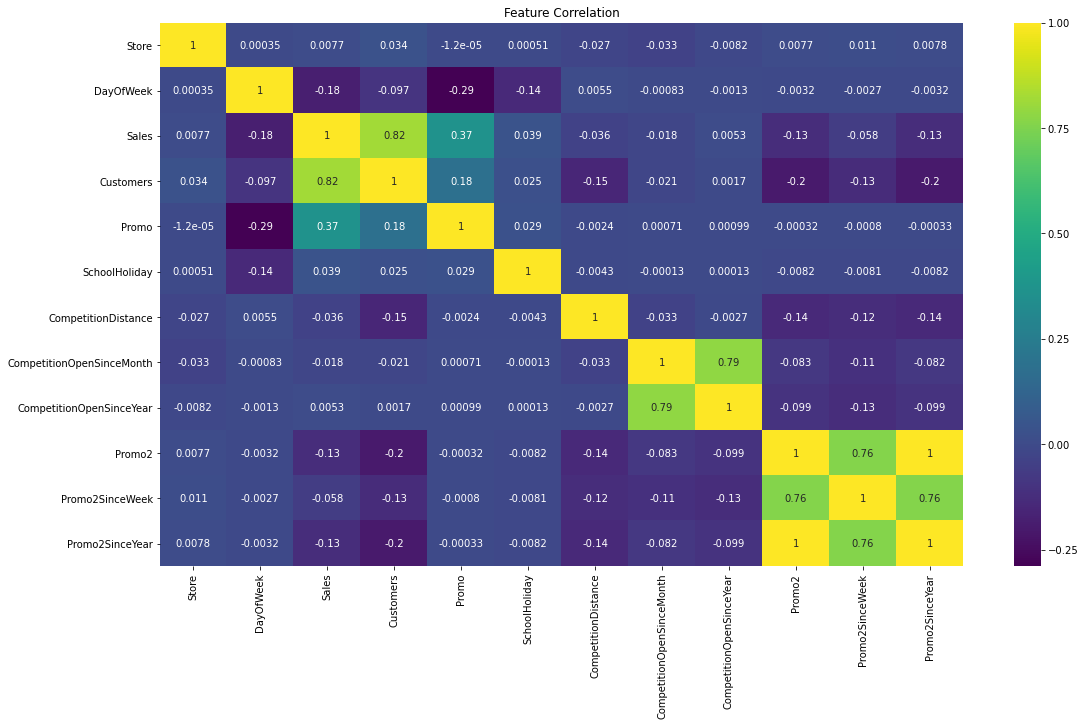

In [218]:
plt.figure(figsize=(18,10))
sns.heatmap(df_merge.corr(), annot=True, cmap='viridis')
plt.ylim(12,0)
plt.title('Feature Correlation')
plt.show()


- ***We can see that the number of Customers on a given day is strongly (positively) correclated to Sales for obvious reasons. For Promo there is some correlation but less so.*** 


- ***There are also strong correlations between other features (not sales), such as Promo2SinceYear, Promo2SinceWeek and Promo2. These are all pretty much closely related to Promo2.***


- ***Note: There is very little correlation between sales and Promo2***

#### <u>Feature Engineering - Date</u>
Lets break up the date into day, month and year and explore possible patterns

****Separate the year, month and day and place in separate columns****

In [205]:
df_merge.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayName
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,Fri
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,Thu


In [219]:
df_merge['Year'] = pd.DatetimeIndex(df_merge['Date']).year
df_merge['Month'] = pd.DatetimeIndex(df_merge['Date']).month
df_merge['Day'] = pd.DatetimeIndex(df_merge['Date']).day
#df_merge['DayName'] = pd.DatetimeIndex(df_merge['Date']).strftime('%A')
#df_merge['DayOfWeek'] = pd.DatetimeIndex(df_merge['Date']).dayofweek
df_merge.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29


****Let's take a look at the average sales and number of customers per month****

****'Groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column****

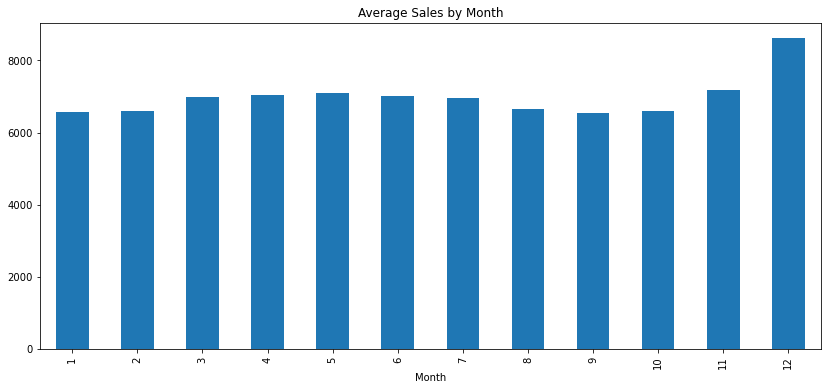

In [220]:
plt.figure(figsize=(14,6))
df_merge.groupby(by='Month')['Sales'].mean().plot(kind='bar')
plt.title('Average Sales by Month')
plt.show()

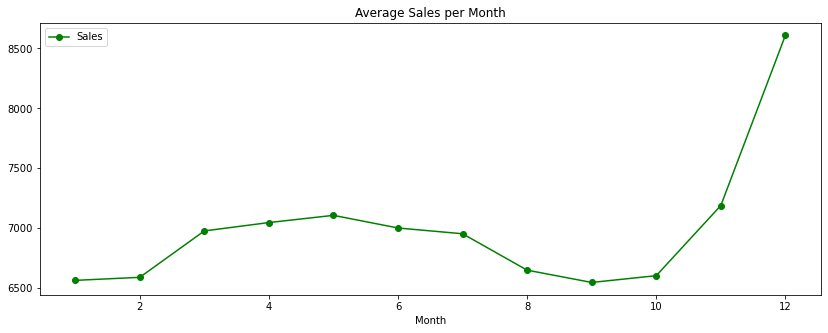

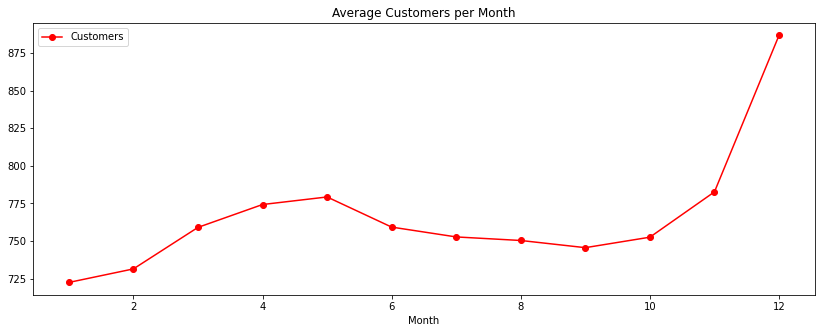

In [221]:
df_merge.groupby(by='Month')['Sales'].mean().plot(figsize=(14,5), marker='o', color='g')
plt.title('Average Sales per Month')
plt.legend()
plt.show()

df_merge.groupby(by='Month')['Customers'].mean().plot(figsize=(14,5), marker='o', color='r')
plt.title('Average Customers per Month')
plt.legend()
plt.show()

- ***Sales and number of customers begin to climb in November and peak around christmas***
- ***After the Christmas rush, January is the quietest time of the year***

****Let's explore Sales and number of customers per day of the month****

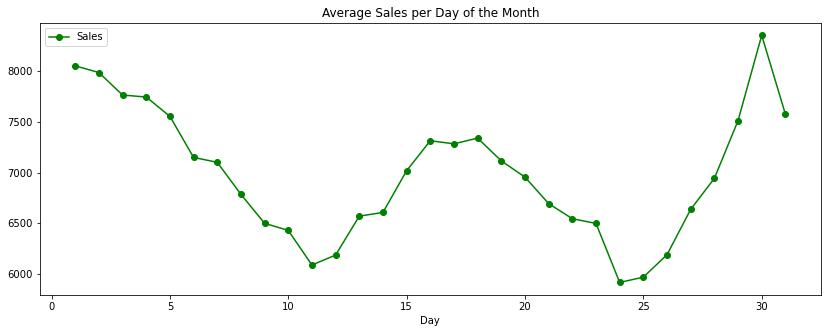

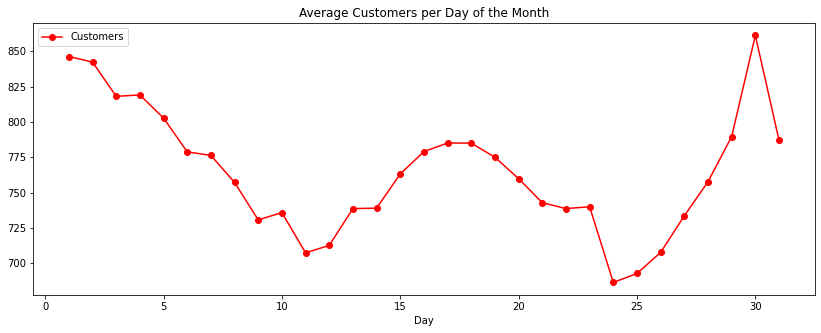

In [222]:
df_merge.groupby(by='Day')['Sales'].mean().plot(figsize=(14,5), marker='o', color='g')
plt.title('Average Sales per Day of the Month')
plt.legend()
plt.show()

df_merge.groupby(by='Day')['Customers'].mean().plot(figsize=(14,5), marker='o', color='r')
plt.title('Average Customers per Day of the Month')
plt.legend()
plt.show()

***Minimum number of customers and sales are generally around the 24th of the month***

***Largest number of customers and sales are around 30th and 1st of the month***

***This probably a reflection of pay cycles when people have more disposable income and/or price reductions at the end of the month. There's porentially a lot more to explore here and business knowledge can help explain these patterns.***

****Let's do the same for the day of the week  (note that 6 = Sunday)****


In [223]:
# # list the days in DayOfWeek
# df_merge['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 6, 7], dtype=int64)

****The DayOfWeek is in nurmeriacl form. Lets add another column with the actual name of the day****

- ***Note: Monday = 1, Tuesday = 2, ......, Sunday = 7***

In [227]:
# labels = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'}
# df_merge['DayName'] = df_merge['DayOfWeek'].map(labels)
# df_merge['DayName'].unique()

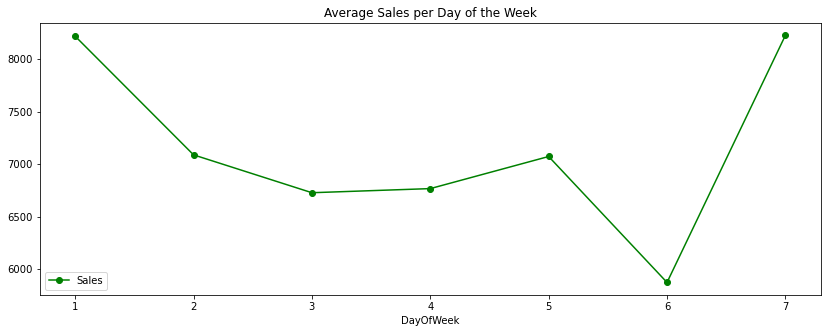

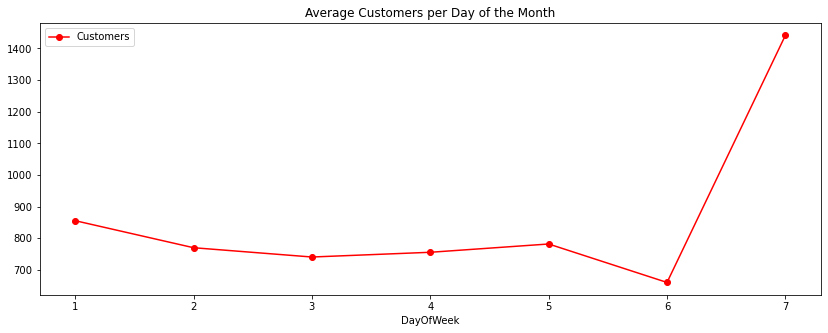

In [228]:
df_merge.groupby(by='DayOfWeek')['Sales'].mean().plot(figsize=(14,5), marker='o', color='g')
plt.title('Average Sales per Day of the Week')
plt.legend()
plt.show()

df_merge.groupby(by='DayOfWeek')['Customers'].mean().plot(figsize=(14,5), marker='o', color='r')
plt.title('Average Customers per Day of the Month')
plt.legend()
plt.show()

- ***Sunday and Monday appear to be the busiest days of the week for sales***

- ***However, in terms of number of customer numbers, Sunday again is the busiest but less so on a Monday.***


****Which type of store has the largest number of sales?****

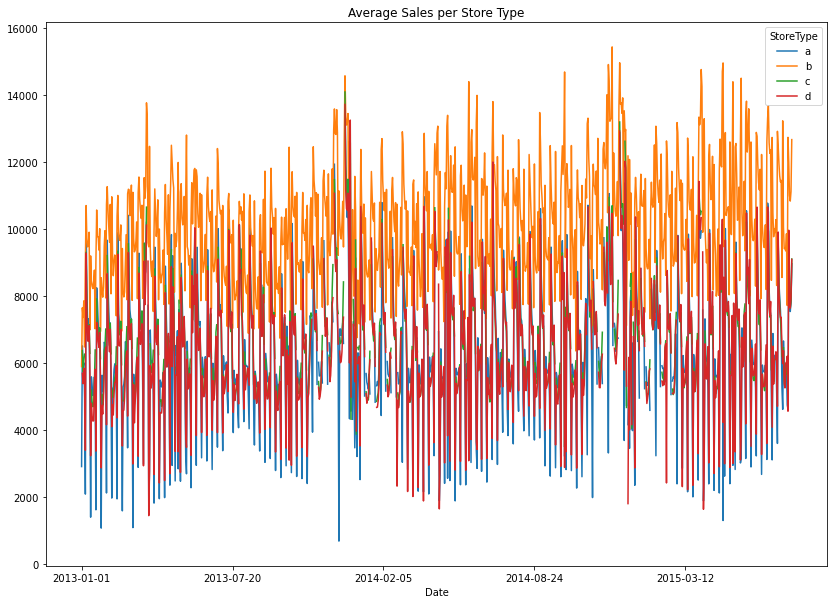

In [234]:
df_merge.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(figsize=(14,10))
plt.title('Average Sales per Store Type')
plt.show()

- ***Store b as the higest average Sales***